# Features Engineering | recovery-news-data.csv

*CS 539 - Social Media Mining | Francesca Spezzano*

*Computer Science | Boise State University*

*11.03.2022 | Fall 2022*

*Aida Gomezbueno Berezo | aidagomezbuenobe@u.boisestate.edu*

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import time
import datetime
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MaxAbsScaler

#### Download & prepare dataset

In [16]:
#Download
data = pd.read_csv(r'recovery-news-data.csv')
df = pd.DataFrame(data)
df.columns = ['index', 'news_ID', 'url', 'publisher', 'publish_date', 'author', 'title', 'image', 'body_text', 'political_bias', 'country', 'reliability']
feature_cols = ['url', 'publisher', 'publish_date', 'author', 'title', 'body_text', 'political_bias', 'country']
#Reliability is the label as: 1 - real, 0 - fake.
label = ['reliability']
X = df[feature_cols]
Y = df[label]
df.head()

,index,news_ID,url,publisher,publish_date,author,title,image,body_text,political_bias,country,reliability
0,0,0,https://www.nytimes.com/article/what-is-corona...,The New York Times,2020-01-21,"['Knvul Sheikh', 'Roni Caryn Rabin']",The Coronavirus: What Scientists Have Learned ...,https://static01.nyt.com/images/2020/03/12/sci...,\nA novel respiratory virus that originated in...,Left,USA,1
1,1,1,https://www.npr.org/2020/01/22/798392172/chine...,National Public Radio (NPR),2020-01-22,['Emily Feng'],Chinese Health Officials: More Die From Newly ...,https://media.npr.org/include/images/facebook-...,Chinese Health Officials: More Die From Newly ...,Center,USA,1
2,2,2,https://www.theverge.com/2020/1/23/21078457/co...,The Verge,2020-01-23,['Nicole Wetsman'],Everything you need to know about the coronavirus,https://cdn.vox-cdn.com/thumbor/a9_Oz7cvSBKyal...,Public health experts around the globe are scr...,Left-center,USA,1
3,3,3,https://www.worldhealth.net/news/novel-coronav...,WorldHealth.Net,2020-01-24,[],Novel Coronavirus Cases Confirmed To Be Spreading,https://www.worldhealth.net/media/original_ima...,The first two coronavirus cases in Europe have...,NaN,USA,0
4,4,4,https://www.theverge.com/2020/1/24/21080845/co...,The Verge,2020-01-24,"['Nicole Wetsman', 'Zoe Schiffer', 'Jay Peters...",Coronavirus disrupts the world: updates on the...,https://cdn.vox-cdn.com/thumbor/t2gt1SmEni4Mcr...,"A new coronavirus appeared in Wuhan, China, at...",Left-center,USA,1


#### Data processing

In [17]:
#FEATURE: URL
df['url'] = df['url'].fillna("0")
df_url = df['url']
unique_vals = pd.unique(df_url)
url_dict = {}
n = 1
for i in unique_vals:
    url_dict[i] = n
    n+=1
    #print(i)
for i in df['url']:
    df['url'] = df['url'].replace(i, url_dict.get(i))

In [18]:
#FEATURE: PUBLISHER
df['publisher'] = df['publisher'].fillna("0")
df_publisher = df['publisher']
unique_vals = pd.unique(df_publisher)
pub_dict = {}
n = 1
for i in unique_vals:
    pub_dict[i] = n
    n+=1
for i in df['publisher']:
    df['publisher'] = df['publisher'].replace(i, pub_dict.get(i))

In [19]:
#FEATURE: PUBLISH_DATE
df['publish_date'] = df['publish_date'].fillna("1970-01-01")
epoch = datetime.utcfromtimestamp(0)
for i in df['publish_date']:
    i = str(i)
    date_object = datetime.strptime(i, '%Y-%m-%d').date()
    delta = date_object - epoch.date()
    df['publish_date'] = df['publish_date'].replace(i, int(delta.total_seconds()))

In [20]:
#FEATURE: AUTHOR
df['author'] = df['author'].fillna("0")
df_author = df['author']
author_dict = {}
n=1
unique_vals = pd.unique(df_author)
#Maybe would be more accurate if rather than considering having sets of authors repeatedly, split them in several columns or whatever
#uniq = []
#for i in unique_vals:
    #i = str(i)
    #i = i.replace("[", "")
    #i = i.replace("]", "")
    #i = i.replace("'", "")
    #uniq.append(i)
#Currently w/o splitting
for i in unique_vals:
    author_dict[i] = n
    n+=1
for i in df['author']:
    df['author'] = df['author'].replace(i, author_dict.get(i))

In [21]:
#FEATURE: TITLE
df['title'] = df['title'].fillna("0")
df_title = df['title']
unique_vals = pd.unique(df_title)
title_dict = {}
n = 1
for i in unique_vals:
    title_dict[i] = n
    n+=1
for i in df['title']:
    df['title'] = df['title'].replace(i, title_dict.get(i))

In [22]:
#FEATURE: POLITICAL_BIAS
df['political_bias'] = df['political_bias'].fillna("0")
df_bias = df['political_bias']
unique_vals = pd.unique(df_bias)
bias_dict = {}
n = 1
for i in unique_vals:
    bias_dict[i] = n
    n+=1
for i in df['political_bias']:
    df['political_bias'] = df['political_bias'].replace(i, bias_dict.get(i))

In [23]:
#FEATURE: COUNTRY
df['country'] = df['country'].fillna("0")
df_count = df['country']
unique_vals = pd.unique(df_count)
count_dict = {}
n = 1
for i in unique_vals:
    count_dict[i] = n
    n+=1
for i in df['country']:
    df['country'] = df['country'].replace(i, count_dict.get(i))

In [24]:
#FEATURE: BODY_TEXT
df['body_text'] = df['body_text'].fillna("0")
df_text = df['body_text']
unique_vals = pd.unique(df_text)
text_dict = {}
n = 1
for i in unique_vals:
    text_dict[i] = n
    n+=1
for i in df['body_text']:
    df['body_text'] = df['body_text'].replace(i, text_dict.get(i))

In [25]:
#FEATURE: IMAGE
df['image'] = df['image'].fillna("0")
df_image = df['image']
unique_vals = pd.unique(df_text)
image_dict = {}
n = 1
for i in unique_vals:
    image_dict[i] = n
    n+=1
for i in df['image']:
    df['image'] = df['image'].replace(i, image_dict.get(i))

In [26]:
#Drop meaningless columns + image (are we finally going to consider study images?)
df = df.drop(columns=['image', 'index', 'news_ID'])
df.head()

,url,publisher,publish_date,author,title,body_text,political_bias,country,reliability
0,1,1,1579564800,1,1,1,1,1,1
1,2,2,1579651200,2,2,2,2,1,1
2,3,3,1579737600,3,3,3,3,1,1
3,4,4,1579824000,4,4,4,4,1,0
4,5,3,1579824000,5,5,5,3,1,1


### Feature scaling

*With the aim of **improving performance** and better consider between features importances (based on coefficients).*

In [27]:
#Features to scale
cols = ['url', 'publisher', 'publish_date', 'author', 'title', 'body_text',
       'political_bias', 'country']
df2 = df[cols]
#Features not to scale
cols = ['reliability']
df3 = df[cols]
scaler = StandardScaler()
#scaler = MaxAbsScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns= ['url', 'publisher', 'publish_date', 'author', 'title', 'body_text',
       'political_bias', 'country'])
df = pd.concat([df2, df3], axis=1)
cols = ['url', 'publisher', 'publish_date', 'author', 'title', 'body_text',
       'political_bias', 'country', 'reliability']
df = df[cols]
df.head()

,url,publisher,publish_date,author,title,body_text,political_bias,country,reliability
0,-1.731574,-1.159542,0.019508,-0.939867,-1.732073,-1.591654,-1.635820,-0.424351,1
1,-1.729866,-1.089398,0.020143,-0.936560,-1.730360,-1.589905,-0.999738,-0.424351,1
2,-1.728158,-1.019253,0.020778,-0.933253,-1.728647,-1.588156,-0.363655,-0.424351,1
3,-1.726450,-0.949109,0.021412,-0.929947,-1.726934,-1.586407,0.272428,-0.424351,0
4,-1.724742,-1.019253,0.021412,-0.926640,-1.725222,-1.584658,-0.363655,-0.424351,1


### Plot results

Accuracy: 92.28%


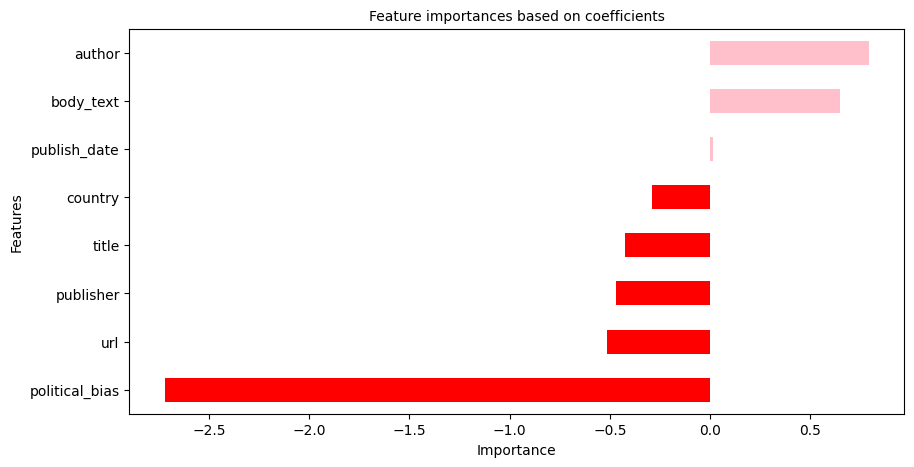

In [28]:
#SPLIT DATA
feature_cols = ['url', 'publisher', 'publish_date', 'author', 'title', 'body_text',
       'political_bias', 'country']
X = df[feature_cols]
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)

#TRAIN MODEL
model = LogisticRegression()
model.fit(X_train,Y_train.values.ravel())
Y_pred = model.predict(X_test)

#PLOT RESULTS
coeff = list(model.coef_[0])
labels = list(X.columns)
features = pd.DataFrame()
features['features'] = feature_cols
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 5), color = features.positive.map({True: 'pink', False: 'red'}))
plt.title('Feature importances based on coefficients', size=10)
plt.xlabel('Importance')
plt.ylabel('Features')

#PRINT ACCURACY
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, Y_pred)*100))